### Problem Set
A. Simulate the Ising model on a square lattice using the demon algorithm. The total number of spins N = L^2 , where L is the length of one side of the lattice. Use periodic boundary conditions as shown in Figure 15.2 so that spins in the left-hand column interact with spins in the right-hand column, etc. Do not include nonequilibrium configurations in your averages.

B. Compute <E_d> and <M^2> as a function of E for B = 0. Choose L = 20 and run for at least 500 mcs. Use (15.10) to determine the dependence of T on E and plot E versus T.

C. Repeat the simulations in part (b) for L = 20. Run until your averages are accurate to within a few percent.<br> Describe how the energy versus temperature changes with lattice size.
 - The temperature and energy both seem to have an inverse relationship with eachother this seems to make sence as energy can not be created or destroyed, so it can change from one type to anoter

D. Modify your program to make “snapshots” of the spin configurations. Describe the nature of the configurations at different energies or temperatures. Are they ordered or disordered? Are there domains of up or down spins?
 - the configurations all seem to have a generalized order to them that is easy to see if you watch for enough iterations.
 - The lattice consists of domains of up and down spins These ares are formed due to the additional energy required to be able to change a point surrounded by similar spins compared to a point that has equal up and down spins.
 - When you have larger amounts of system energy the up and down spins form smaller and smaller groups untill it is dificult to see any prevalent patten like you can when the system energy is closer to zero
### System energy 50
<img src="Data50.png"     style="float: left; margin-right: 10px;" /><br>
### System energy 100
<img src="Data100.png"     style="float: left; margin-right: 10px;" /><br>
### System energy 200
<img src="Data200.png"     style="float: left; margin-right: 10px;" /><br>
### System energy 300
<img src="Data300.png"     style="float: left; margin-right: 10px;" /><br>


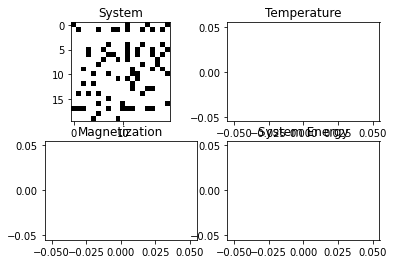

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import time


class IsingDemon:

    def __init__(self,N,sE):
        self.N = N
        self.demonEnergyDistribution = np.zeros(128,dtype=np.int8)
        self.lattice = np.ones((N,N),dtype=np.int8)*-1

        self.systemEnergy = sE  # desired energy value?
        self.demonEnergy = 0
        E= -N*N
        self.magnetization = -N*N
        while (E<self.systemEnergy):
            x_rand = random.randint(0,N-1)
            y_rand = random.randint(0,N-1)
            dE = self.deltaE(x_rand,y_rand)
            if (dE>0):
                new_spin = self.lattice[x_rand,y_rand] = -self.lattice[x_rand,y_rand]
                E += dE
                self.magnetization += new_spin*2

        self.resetData()

    def deltaE (self,x,y):
        return  2*self.lattice[x,y]*(self.lattice[(x-1),y]+\
            self.lattice[(x+1+self.N)%self.N,y]+self.lattice[x,(y-1)]+\
            self.lattice[x,(y+1+self.N)%self.N])

    def resetData(self):
        self.mcs = 0
        self.systemEnergyAccumulator = 0
        self.demonEnergyAccumulator = 0
        self.mAccumulator = 0
        self.m2Accumulator = 0
        self.acceptedMoves = 0
        self.magnetization_data=[]
        self.systemEnergy_data = []
        self.temp = []
        self.m2_data=[]


    def doOneStep(self):
        for j in range(self.N*self.N):
            x_rand = random.randint(0,self.N-1)
            y_rand = random.randint(0,self.N-1)
            dE = self.deltaE(x_rand,y_rand)

            if dE <= self.demonEnergy:
                new_spin = -self.lattice[x_rand,y_rand]
                self.lattice[x_rand, y_rand]= new_spin
                self.acceptedMoves +=1
                # System gives Energy to demon
                self.systemEnergy += dE
                self.demonEnergy -= dE
                self.magnetization += 2*new_spin

                self.demonEnergyAccumulator += self.demonEnergy

        self.demonEnergyDistribution[int(self.demonEnergy)] +=1
        self.mcs += 1
        self.mAccumulator += self.magnetization
        self.m2Accumulator += self.magnetization * self.magnetization
        self.systemEnergyAccumulator += self.systemEnergy
        # Stores data in arrays for graphing
        self.magnetization_data.append(self.mAccumulator/(self.mcs*self.N*self.N))
        self.systemEnergy_data.append(self.systemEnergyAccumulator/self.mcs)
        self.temp.append(self.temperature())
        self.m2_data.append(self.m2Accumulator/(self.mcs*self.N*self.N))




    def temperature(self): # Range 2-5??
        return 4. / np.log(1. + 4. / (self.demonEnergyAccumulator / (self.mcs * self.N*self.N)))



### Animation code thanks to Anthony!
def animate(counter):
        #used to save graphs as pngs
    # if counter == 100:
    #     plt.savefig("Data{}.png".format(ising_model.systemEnergy))

    # Run a step in the simulation and display the simulation image
    ising_model.doOneStep()
    im.set_data(ising_model.lattice)
    # Plot temp, magnetism, and system energy over monte carlo steps
    x_data = np.arange(1, ising_model.mcs + 1)
    temp_line.set_data(x_data, ising_model.temp)
    mag_line.set_data(x_data, ising_model.magnetization_data)
    sys_energy_line.set_data(x_data, ising_model.systemEnergy_data)
    energy_temp_line.set_data(ising_model.systemEnergy_data,ising_model.temp)
    m2_line.set_data(x_data,ising_model.m2_data)
    # Reset the scale and limits of the plots
    ax[0, 0].relim()
    ax[0, 0].autoscale_view(True, True, True)
    ax[0, 1].relim()
    ax[0, 1].autoscale_view(True, True, True)
    ax[0, 2].relim()
    ax[0, 2].autoscale_view(True, True, True)

    ax[1, 0].relim()
    ax[1, 0].autoscale_view(True, True, True)
    ax[1, 1].relim()
    ax[1, 1].autoscale_view(True, True, True)
    ax[1, 2].relim()
    ax[1, 2].autoscale_view(True, True, True)






N = 20
temp = []
lattice = []

ising_model = IsingDemon(N,300)
# Initialize the dashboard
fig, ax = plt.subplots(2, 3)
im = ax[0, 0].imshow(ising_model.lattice, cmap='Greys')
temp_line, = ax[0, 1].plot([], [], lw=3)

m2_line, = ax[0, 2].plot([], [], lw=3)
mag_line, = ax[1, 0].plot([], [], lw=3)
sys_energy_line, = ax[1, 1].plot([], [], lw=3)

energy_temp_line, = ax[1, 2].plot([], [],'ro', lw=3)
ax[0, 0].set_title('System')
ax[0, 1].set_title('Temperature')
ax[0, 2].set_title('<M2>')

ax[1, 0].set_title('Magnetization')
ax[1, 1].set_title('System Energy')
ax[1, 2].set_title('System Energy vs Temp')
# ax[1, 0].set_title('Magnetization')


line_ani = animation.FuncAnimation(fig, animate,500,repeat=False )

plt.show()




I was unable to get the code to run after pasting it in to the notebook, I included the origional .py